<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/12_RF_VIF_AGE_CLASS-6-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np
import pandas_profiling

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
df['PAY_AVR'] = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

In [9]:
df['BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [10]:
df['PAY_AMT'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [11]:
df_featured = df.drop(['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [12]:
columns = list(df_featured.columns)

In [13]:
columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AVR', 'BILL_AMT', 'PAY_AMT',  'default.payment.next.month']

In [14]:
df_featured =df_featured[columns]

In [15]:
df = df_featured

In [16]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AVR,BILL_AMT,PAY_AMT,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.182439,44976.945200,5275.232094,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.982176,63260.721860,10137.946323,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-56043.166667,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-0.833333,4781.333333,1113.291667,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,21051.833333,2397.166667,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,57104.416667,5583.916667,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,6.000000,877313.833333,627344.333333,1.000000


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# data= df.drop(['default.payment.next.month'],1)
# vif = pd.DataFrame()
# vif['Features']= data.columns
# vif['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
# vif

In [17]:
# using the above plot we can create age bins
age = 7
lab = [7, 6, 5, 4, 3 ,2, 1]
df['AGE_CLASS'] = pd.cut(df['AGE'], bins= age,labels=lab)

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AVR',
       'BILL_AMT', 'PAY_AMT', 'default.payment.next.month', 'AGE_CLASS'],
      dtype='object')

In [ ]:
df.describe()

In [20]:
df['AGE_CLASS'].describe()

count     30000
unique        7
top           7
freq       9618
Name: AGE_CLASS, dtype: int64

In [24]:
data1= df.drop(['AGE', 'MARRIAGE', 'SEX', 'ID'],1, inplace=True)
# vif = pd.DataFrame()
# vif['Features']= data1.columns
# vif['vif']= [variance_inflation_factor(data1.values,i) for i in range(data1.shape[1])]
# vif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [25]:
df.columns

Index(['LIMIT_BAL', 'EDUCATION', 'PAY_AVR', 'BILL_AMT', 'PAY_AMT',
       'default.payment.next.month', 'AGE_CLASS'],
      dtype='object')

In [ ]:
# data1.describe()

In [ ]:
# df.profile_report()

In [32]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

In [ ]:
#df.describe()

In [26]:
X = df.drop('default.payment.next.month', axis =1).values
y = df['default.payment.next.month'].values
print(X.shape)
print(y.shape)

(30000, 6)
(30000,)


Split my data into training and testing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

Instantiate the random forest model with 200 trees

In [28]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [30]:
y_predict = rf.predict(X_test)

Check feature importance


In [33]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.2997936428205768, 'PAY_AVR'),
 (0.2304495214353074, 'PAY_AMT'),
 (0.2300029934148595, 'BILL_AMT'),
 (0.13613444729118704, 'LIMIT_BAL'),
 (0.060517717046888755, 'default.payment.next.month'),
 (0.043101677991180636, 'EDUCATION')]

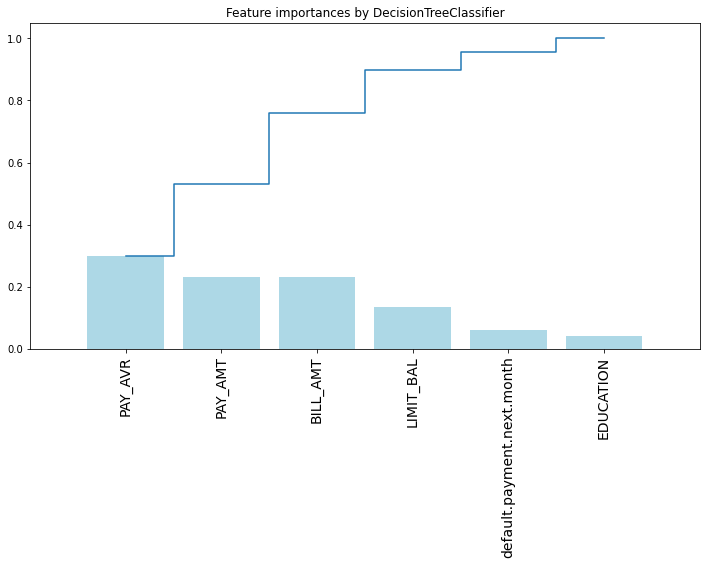

In [34]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [35]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [36]:
X_test.shape

(9000, 6)

In [37]:
#Make my predictions
y_prediction = rf.predict(X_test)

In [38]:
y_probability = rf.predict_proba(X_test)

In [39]:
y_probability.shape

(9000, 2)

In [40]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.31887755102040816


In [41]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [42]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.83      0.94      0.88      7040
     default       0.58      0.32      0.41      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000



In [ ]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [43]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6594  446]
 [1335  625]]


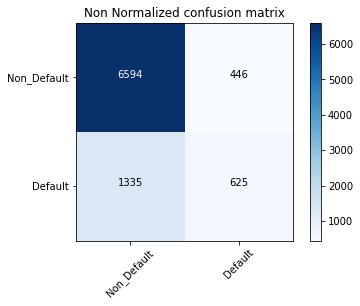

In [45]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')